# Обработка и визуализация

Подготовка данных была выполнена на python. Получил данные в переменную и сохранил их в csv файл для импорта в R. Вариант 17 - 17 BEN Franklin Resources Financials

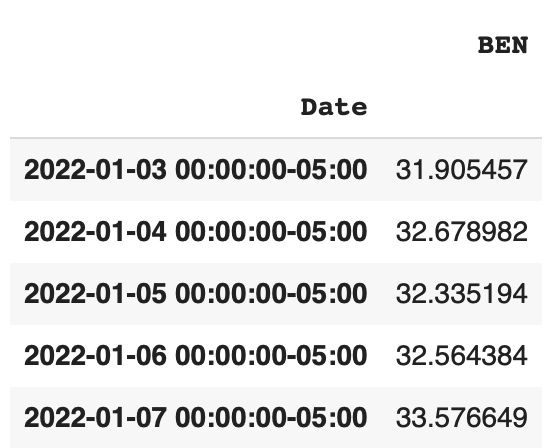

Перейдем к доходностям и сохраним в переменной rates

In [13]:
Data <- read.csv("BEN.csv",sep=",")
ndates <- as.Date(Data$Date, "%Y-%m-%d") 
count <- length(Data$Date) 
rates <- Data$BEN[2:count]/Data$BEN[1:(count - 1)] - 1

Визуализируем данные

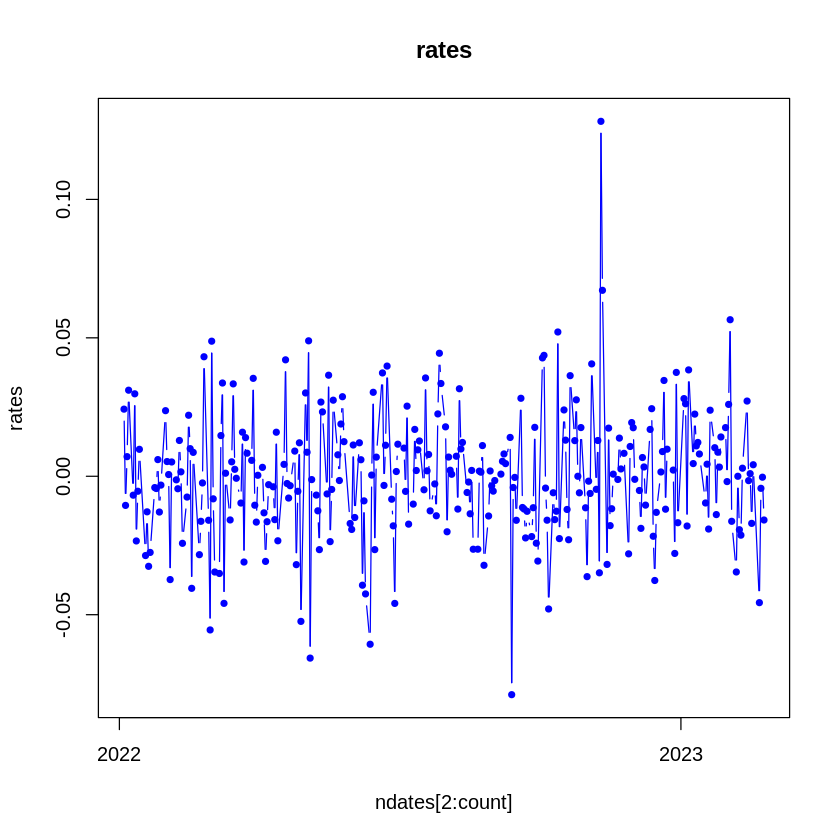

In [14]:
matplot(ndates[2:count], rates,type="b",pch =20,col = 'blue',main = "rates")

In [ ]:
install.packages('fBasics')
library(fBasics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’




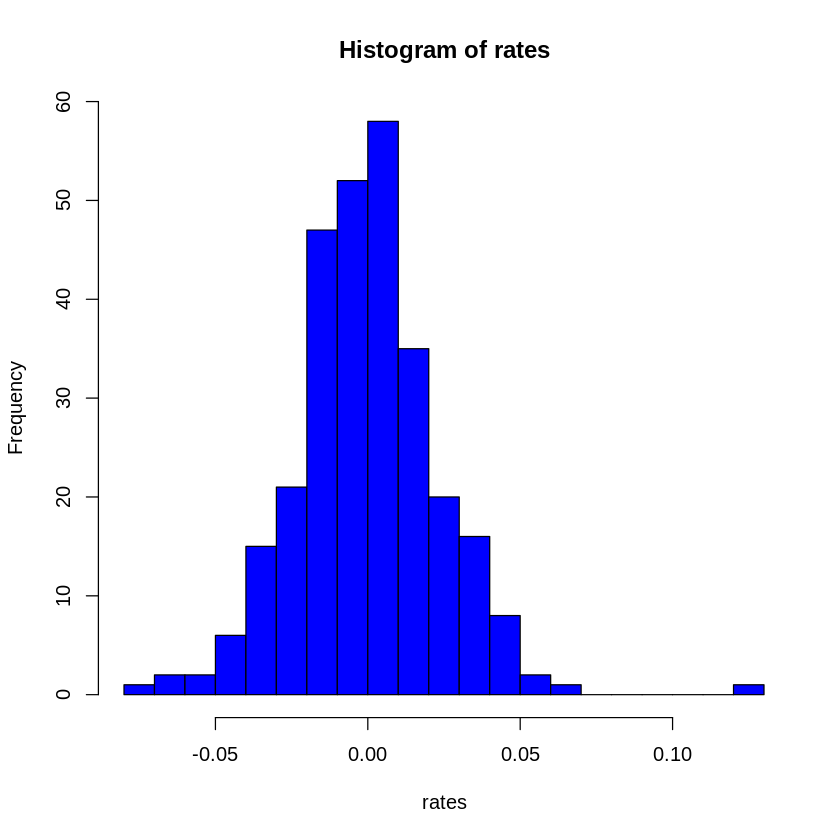

In [15]:
h <- hist(rates,col = "blue",nclass=20)

In [ ]:
install.packages('timeSeries')
library(timeSeries)
install.packages('timeDate')
library(timeDate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: timeDate

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



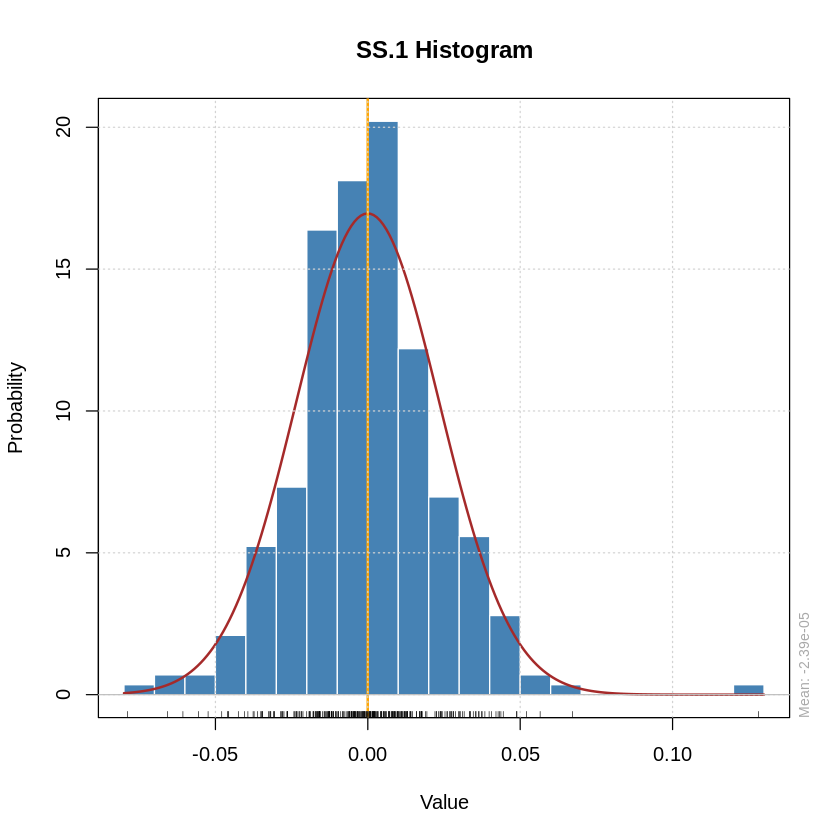

In [16]:
histPlot(as.timeSeries(rates))

# Гипотеза случайности

In [ ]:
install.packages('randtests')
library(randtests)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('rriskDistributions')
library(rriskDistributions)

In [17]:
rank.test(rates)


	Mann-Kendall Rank Test

data:  rates
statistic = 1.0013, n = 287, p-value = 0.3167
alternative hypothesis: trend


In [18]:
bartels.rank.test(rates)


	Bartels Ratio Test

data:  rates
statistic = 0.49268, n = 287, p-value = 0.6222
alternative hypothesis: nonrandomness


In [19]:
cox.stuart.test(rates)


	Cox Stuart test

data:  rates
statistic = 76, n = 143, p-value = 0.5036
alternative hypothesis: non randomness


In [20]:
runs.test(rates)


	Runs Test

data:  rates
statistic = 0, runs = 144, n1 = 143, n2 = 143, n = 286, p-value = 1
alternative hypothesis: nonrandomness


In [21]:
turning.point.test(rates)


	Turning Point Test

data:  rates
statistic = 0.28088, n = 287, p-value = 0.7788
alternative hypothesis: non randomness


5 разных тестов единогласно отвергают гипотезу случайности

# Гипотеза однородности

In [22]:
split_point <- match(as.Date('2022-06-01'), ndates)

In [23]:
Data$Date[split_point]

[1] "2022-06-01 00:00:00-04:00"

In [24]:
Data$Date[2 * split_point]

[1] "2022-10-28 00:00:00-04:00"

wilcox.test требует одинаковый размер выборок, a ks.test при разных размерах предупреждает о приблизительном p-value

In [25]:
length(rates[(split_point + 1): (2 * split_point)])

[1] 104

In [26]:
wilcox.test(rates[1:split_point], rates[(split_point + 1): (2 * split_point)], paired = T)


	Wilcoxon signed rank test with continuity correction

data:  rates[1:split_point] and rates[(split_point + 1):(2 * split_point)]
V = 2650, p-value = 0.7966
alternative hypothesis: true location shift is not equal to 0


In [27]:
ks.test(rates[1:split_point], rates[(split_point + 1): (2 * split_point)])


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  rates[1:split_point] and rates[(split_point + 1):(2 * split_point)]
D = 0.076923, p-value = 0.918
alternative hypothesis: two-sided


В обоих результатах p-value больше 0.05. Вывод:гипотеза об однородности не отвергается

# Предположение о виде распределения

In [ ]:
#library(rriskDistributions)
#fit.cont(data2fit = rates)
#Код был выполнен в среде на более ранней версии R(в этом ноутбуке версия 4.3.0)
#результат приведен ниже

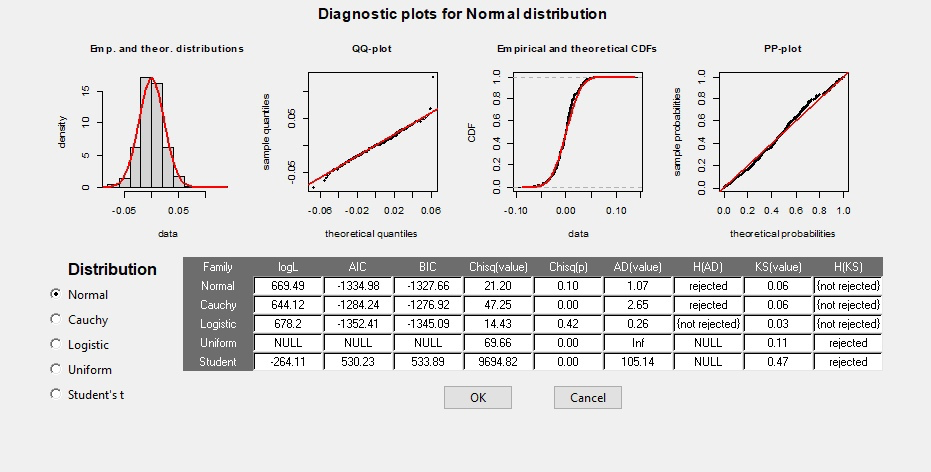

>Само распределение похоже на нормальное на первый взгляд, но с тяжелыми хвостами. Функция плотности распределения Коши имеет более низкие хвосты чем нормальное. Поэтому логичнее выдвинуть гипотезу о логистической функции распределения. 

# Разделенение выборки на тренировочную и тестовую части

Разделяем случайно выборку на две части тренировочную и тестовую

In [34]:
install.packages('caTools')
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [159]:
set.seed(2)

In [160]:
sample <- sample.split(rates, SplitRatio=0.5)

In [161]:
head(sample)

[1]  TRUE FALSE FALSE  TRUE FALSE FALSE

In [162]:
train <- subset(rates, sample==TRUE)
test <- subset(rates, sample==FALSE)

# Новый раздел

In [76]:
install.packages('MASS')
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [163]:
fitting_normal <- fitdistr(train, "normal")

In [164]:
fitting_normal

       mean            sd     
  0.0000684166   0.0260549667 
 (0.0021788258) (0.0015406625)

In [165]:
fitting_logistic <- fitdistr(train, "logistic")

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”
Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”


In [166]:
fitting_logistic

     location          scale    
  -0.0006550315    0.0140430910 
 ( 0.0020301598) ( 0.0009676493)

In [110]:
install.packages('LambertW')
library(LambertW)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [167]:
library(ggplot2)
ks.test(test,'plogis', fitting_logistic$estimate[1], fitting_logistic$estimate[2])


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  test
D = 0.084169, p-value = 0.2594
alternative hypothesis: two-sided


In [168]:
ks.test(test,'pnorm', fitting_normal$estimate[1], fitting_normal$estimate[2])


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  test
D = 0.12022, p-value = 0.03114
alternative hypothesis: two-sided


In [170]:
h <- hist(test, plot = F)
E <- h$breaks
n <- length(test)
dens <- h$density*n
install.packages('zoo')
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [171]:
breaks_cdf_1 <- pnorm(E, fitting_normal$estimate[1], fitting_normal$estimate[2])
null.probs_1 <- rollapply(breaks_cdf_1,2, function(x) x[2]-x[1])
chisq.test(x = dens,p = null.probs_1,rescale.p= T)


	Chi-squared test for given probabilities

data:  dens
X-squared = 725.18, df = 6, p-value < 2.2e-16


In [172]:
sum(null.probs_1)

[1] 0.9882221

In [175]:
breaks_cdf_2 <- plogis(E, fitting_logistic$estimate[1], fitting_logistic$estimate[2])
null.probs_2 <- rollapply(breaks_cdf_2,2, function(x) x[2]-x[1])
chisq.test(x = dens,p = null.probs_2,rescale.p= T)


	Chi-squared test for given probabilities

data:  dens
X-squared = 321.37, df = 6, p-value < 2.2e-16


In [174]:
sum(null.probs_2)

[1] 0.9833596

> Гипотезу о нормальном распределении отвергают оба теста. Гипотезу о логистической функции распределения(с параметрами на тренировочной выборке) для тестовой выборки один тест отвергает, другой не отвергает. С учетом вывода функции fit.cont можно принять гипотезу о логистичнском распределении, но с какими-то другими параметрами для тестовой выборки